### Inhaltsverzeichnis

* [1. Business Understanding](#chapter1)
    * [1.1. Projektbeschreibung](#section_1_1)
    * [1.2. Data Dictionary](#section_1_2)
* [2. Data Understanding](#chapter2)
    * [2.1. Pakete importieren](#section_2_1)
    * [2.2. Daten einlesen](#section_2_2)
    * [2.3. Datensatz anzeigen](#section_2_3)
    * [2.4. Spaltennamen und Datentypen](#section_2_4)
    * [2.5. Datentypen anpassen](#section_2_5)
        * [2.5.1 Variable Age](#section_2_5_1)
        * [2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage](#section_2_5_2)
        * [2.5.3 Variable Gender](#section_2_5_3)
        * [2.5.4 Variable Region Code](#section_2_5_4)
        * [2.5.5 Variable Vehicle_Age](#section_2_5_5)
        * [2.5.6 Variable Policy_Sales_Channel](#section_2_5_6)
        * [2.5.7 Variable Vintage](#section_2_5_7)
        * [2.5.8 Variable Unnamed: 0](#section_2_5_8)
        * [2.5.9 Angepasste Datentypen anzeigen](#section_2_5_9)
    * [2.6. Deskriptive Analyse](#section_2_6)
        * [2.6.1 Kennzahlen zur Beschreibung des Datensatz](#section_2_6_1)
        * [2.6.2 Prüfung auf Missing Values](#section_2_6_2)
    * [2.7. Korrelation der Variablen](#section_2_7)
    * [2.8. Interpretation der Variablen](#section_2_8)
        * [2.8.1 Interpretation der Variable Gender](#section_2_8_1)
        * [2.8.2 Interpretation der Variable Age](#section_2_8_2)
        * [2.8.3 Interpretation der Variable Driving_License](#section_2_8_3)
        * [2.8.4 Interpretation der Variable Region_Code](#section_2_8_4)
        * [2.8.5 Interpretation der Variable Previously_Insured](#section_2_8_5)
        * [2.8.6 Interpretation der Variable Vehicle_Age](#section_2_8_6)
        * [2.8.7 Interpretation der Variable Vehicle_Damage](#section_2_8_7)
        * [2.8.8 Interpretation der Variable Annual_Premium](#section_2_8_8)
        * [2.8.9 Interpretation der Variable Policy_Sales_Channel](#section_2_8_9)
        * [2.8.10 Interpretation der Variable Vintage](#section_2_8_10)
        * [2.8.11 Interpretation der Variable Response](#section_2_8_11)

### 1. Business Understanding <a class="anchor" id="chapter1"></a>

#### 1.1 Projektbeschreibung <a class="anchor" id="section_1_1"></a>

Das Forschungsteam *ProInsurance* wird damit beauftragt, dass Projekt Cross-Selling-Prediction für den Kunden *NextGen Insurance* durchzuführen. 
Der Kunde benötigt Hilfe bei der Erstellung eines Modells, mit dem sich vorhersagen lässt, ob die Versicherungsnehmer des letzten Jahres auch an einer angebotenen Kfz-Versicherung interessiert sein werden.
Der Kunde wünscht die Durchführung des Projektes innerhalb eines knapp kalkulierten Zeitraums.

Zu diesem Zweck erhält das Forschungsteam von ihrem Auftraggeber einen Datenbestand bestehend aus > 300.000 Datensätzen. Zusätzlich ein Data Dictionary, welches eine kurze Beschreibung der Daten liefert.

Die *NextGen Insurance* hat mehrere Forschungsteams beauftragt an einer Lösung zu arbeiten, damit Sie sich nach Ende der Präsentationen für die beste Alternative entscheiden können.

#### 1.2 Data Dictionary <a class="anchor" id="section_1_2"></a>

Unser Auftraggeber die *NextGen Insurance* stellt uns folgendes Data Dictionary und damit verbunden folgende Beschreibungen der einzelnen Variablen zur Verfügung:

**1 - id : Unique ID for the customer<br>
2 - Gender : Gender of the customer<br>
3 - Age : Age of the customer <br>
4 - Driving_License : 0 : Customer doesn't have DL, 1 : Customer has DL<br>
5 - Region_Code : Unique code for the region of the customer<br>
6 - Previously_Insured : 0 : Customer doesn't have Vehicle Insurance, 1 : Customer has Vehicle Insurance<br> 
7 - Vehicle_Age : Age of the Vehicle<br>
8 - Vehicle_Damage : 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past<br>
9 - Annual_Premium : The amount customer needs to pay as premium in the year for Health insurance<br>
10 - Policy_Sales_Channel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
11 - Vintage : Number of Days customer has been associated with the company<br>
12 - Response : 1 : Customer is interested, 0 : Customer is not interested**

### 2. Data Understanding <a class="anchor" id="chapter2"></a>

#### 2.1 Pakete importieren <a class="anchor" id="section_2_1"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### 2.2 Daten einlesen <a class="anchor" id="section_2_2"></a>

Der Datensatz wurde von der *NextGen Insurance* bereitgestellt.<br>
Der Datensatz wird zur Analyse eingelesen:
- Entfernung des Trennzeichen "$".
- Umwandlung von Zelleninhalten in Wahrheitswerte (Yes, yes, 1; No, no, 0).
- Einrücken des Datensatzes.

In [2]:
data = pd.read_csv("train.csv",
            sep="$", 
            true_values=["Yes", "yes", "1"],
            false_values=["No", "no", "0"],
            index_col=False,
            low_memory=False
)

#### 2.3 Datensatz Anzeigen <a class="anchor" id="section_2_3"></a>

Zur Betrachtung der Variablen aus dem Datensatz werden die ersten zwanzig Einträge angezeigt:

In [3]:
data.head(20)

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,False,28.0,False,> 2 Years,True,40454.0,26.0,217,True
1,1,2,Male,76,False,3.0,False,1-2 Year,False,33536.0,26.0,183,False
2,2,3,Male,47,False,28.0,False,> 2 Years,True,38294.0,26.0,27,True
3,3,4,Male,21,True,11.0,True,< 1 Year,False,28619.0,152.0,203,False
4,4,5,Female,29,True,41.0,True,< 1 Year,False,27496.0,152.0,39,False
5,5,6,Female,24,False,33.0,False,< 1 Year,True,2630.0,160.0,176,False
6,6,7,Male,23,False,11.0,False,< 1 Year,True,23367.0,152.0,249,False
7,7,8,Female,56,False,28.0,False,1-2 Year,True,32031.0,26.0,72,True
8,8,9,Female,24,True,3.0,True,< 1 Year,False,27619.0,152.0,28,False
9,9,10,Female,32,True,6.0,True,< 1 Year,False,28771.0,152.0,80,False


#### 2.4 Spaltennamen und Datentypen <a class="anchor" id="section_2_4"></a>

Um eventuelle Korrekturen vorzunehmen betrachten wir die Datentypen der im Datensatz enthaltenen Variablen.<br>
- Die Spalten **Driving_License**, **Previously_Insured**, und **Vehicle_Damage** wurden nicht in den booleschen Datentypen gecastet. Dies ist ein Indikator dafür das diese Spalten invalide oder fehlende Werte enthalten.
- Die Spalte **Age** wurde nicht in einen Integer oder Float gecastet, auch hier ist dies ein Indikator dafür, dass diese Spalte invalide oder fehlende Werte enthält. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            380999 non-null  int64  
 1   id                    380999 non-null  int64  
 2   Gender                379948 non-null  object 
 3   Age                   370107 non-null  object 
 4   Driving_License       380948 non-null  object 
 5   Region_Code           380999 non-null  object 
 6   Previously_Insured    380948 non-null  object 
 7   Vehicle_Age           380948 non-null  object 
 8   Vehicle_Damage        380948 non-null  object 
 9   Annual_Premium        380999 non-null  float64
 10  Policy_Sales_Channel  380999 non-null  object 
 11  Vintage               380948 non-null  object 
 12  Response              380999 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 35.2+ MB


#### 2.5 Datentypen anpassen <a class="anchor" id="section_2_5"></a>

- Die zum Pandas Modul zugehörige Funktion ".unique()" ermöglicht die Ausgabe aller einzigartigen Werte. Dies erleichtert das Nachvollziehen von Eingabefehlern um diese zu korrigieren.

##### 2.5.1 Variable Age <a class="anchor" id="section_2_5_1"></a>

- Die letzten Werte beinhalten Eingabefehler. Bevor der Datentyp umgewandelt werden kann müssen die zwei Punkte (..) nach den Zahlen entfernt werden. 

In [5]:
data["Age"].unique()

array(['44', '76', '47', '21', '29', '24', '23', '56', '32', '41', '71',
       '37', '25', '42', '60', '65', '49', '34', '51', '26', '57', '79',
       '48', '45', '72', '30', '54', '27', '38', '22', '78', '20', '39',
       '62', '58', '59', '63', '50', '67', '77', '28', '69', '52', '31',
       '33', '43', '36', '53', '70', '46', '55', '40', '61', '75', '64',
       '35', '66', '68', '74', '73', '84', '83', '81', '80', '133', '171',
       '163', '144', '187', '203', '143', '123', '183', '167', '129',
       '127', '142', '82', '175', '128', '150', '196', '154', '198',
       '116', '152', '161', '114', '166', '124', '134', '173', '106',
       '199', '162', '157', '132', '156', '119', '159', '85', '192',
       '201', '177', '121', '160', '136', '148', '158', '113', '184',
       '182', '122', '190', '174', '176', '195', '147', '189', nan, '181',
       '188', '107', '145', '149', '137', '139', '126', '130', '202',
       '138', '193', '109', '179', '155', '125', '172', '200', '135

In [6]:
# convert to string
data["Age"] = data["Age"].astype(pd.StringDtype())

# remove .. as this is what prevents us from propper type conversion
data["Age"] = data["Age"].str.replace(".", "")

# convert to int (no decimals observed in train data)
data["Age"] = data["Age"].astype("Int64")

C:\Users\tomiz\AppData\Local\Temp/ipykernel_26324/2837412874.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Age"] = data["Age"].str.replace(".", "")


##### 2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage <a class="anchor" id="section_2_5_2"></a>

- Die Spalten beinhalten fehlende Werte (NaN). Damit die fehlenden Werte ordnungsgemäß behandelt werden können, müssen die Spalten in den nullable Boolean Type gecastet werden.

In [7]:
print("Driving_License:", data["Driving_License"].unique())
print("Previously_Insured:", data["Previously_Insured"].unique())
print("Vehicle_Damage:", data["Vehicle_Damage"].unique())

Driving_License: [False True nan]
Previously_Insured: [False True nan]
Vehicle_Damage: [True False nan]


In [8]:
# convert each column
data["Driving_License"] = data["Driving_License"].astype(pd.BooleanDtype())
data["Previously_Insured"] = data["Previously_Insured"].astype(pd.BooleanDtype())
data["Vehicle_Damage"] = data["Vehicle_Damage"].astype(pd.BooleanDtype())

##### 2.5.3 Variable Gender <a class="anchor" id="section_2_5_3"></a>

In [9]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
data["Gender"] = data["Gender"].astype("category")

##### 2.5.4 Variable Region Code <a class="anchor" id="section_2_5_4"></a>

- Der letzte Werte beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 41.0 die zwei Rautezeichen (##) entfernt werden.

In [11]:
data["Region_Code"].unique()

array(['28.0', '3.0', '11.0', '41.0', '33.0', '6.0', '35.0', '50.0',
       '15.0', '45.0', '8.0', '36.0', '30.0', '26.0', '16.0', '47.0',
       '48.0', '19.0', '39.0', '23.0', '37.0', '5.0', '17.0', '2.0',
       '7.0', '29.0', '46.0', '27.0', '25.0', '13.0', '18.0', '20.0',
       '49.0', '22.0', '44.0', '0.0', '9.0', '31.0', '12.0', '34.0',
       '21.0', '10.0', '14.0', '38.0', '24.0', '40.0', '43.0', '32.0',
       '4.0', '51.0', '42.0', '1.0', '52.0', '41.0##'], dtype=object)

In [12]:
# convert to string
data["Region_Code"] = data["Region_Code"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
data["Region_Code"] = data["Region_Code"].str.replace("##", "")

# convert to category as the region codes are similar to postal codes and have no order
data["Region_Code"] = data["Region_Code"].astype("category")

##### 2.5.5 Variable Vehicle_Age <a class="anchor" id="section_2_5_5"></a>

In [13]:
data["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year', nan], dtype=object)

In [14]:
# no cleanup required
data["Vehicle_Age"] = data["Vehicle_Age"].astype("category")

##### 2.5.6 Variable Policy_Sales_Channel <a class="anchor" id="section_2_5_6"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 26.0 die zwei Rautezeichen (##) entfernt werden.

In [15]:
data["Policy_Sales_Channel"].unique()

array(['26.0', '152.0', '160.0', '124.0', '14.0', '13.0', '30.0', '156.0',
       '163.0', '157.0', '122.0', '19.0', '22.0', '15.0', '154.0', '16.0',
       '52.0', '155.0', '11.0', '151.0', '125.0', '25.0', '61.0', '1.0',
       '86.0', '31.0', '150.0', '23.0', '60.0', '21.0', '121.0', '3.0',
       '139.0', '12.0', '29.0', '55.0', '7.0', '47.0', '127.0', '153.0',
       '78.0', '158.0', '89.0', '32.0', '8.0', '10.0', '120.0', '65.0',
       '4.0', '42.0', '83.0', '136.0', '24.0', '18.0', '56.0', '48.0',
       '106.0', '54.0', '93.0', '116.0', '91.0', '45.0', '9.0', '145.0',
       '147.0', '44.0', '109.0', '37.0', '140.0', '107.0', '128.0',
       '131.0', '114.0', '118.0', '159.0', '119.0', '105.0', '135.0',
       '62.0', '138.0', '129.0', '88.0', '92.0', '111.0', '113.0', '73.0',
       '36.0', '28.0', '35.0', '59.0', '53.0', '148.0', '133.0', '108.0',
       '64.0', '39.0', '94.0', '132.0', '46.0', '81.0', '103.0', '90.0',
       '51.0', '27.0', '146.0', '63.0', '96.0', '40.0', 

In [16]:
# remove ## as this is what prevents us from propper type conversion
data["Policy_Sales_Channel"] = data["Policy_Sales_Channel"].str.replace("##", "")

data["Policy_Sales_Channel"] = data["Policy_Sales_Channel"].astype("category")

##### 2.5.7 Variable Vintage <a class="anchor" id="section_2_5_7"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 81 die zwei Rautezeichen (##) entfernt werden.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

In [17]:
data["Vintage"].unique()

array(['217', '183', '27', '203', '39', '176', '249', '72', '28', '80',
       '46', '289', '221', '15', '58', '147', '256', '299', '158', '102',
       '116', '177', '232', '60', '180', '49', '57', '223', '136', '222',
       '149', '169', '88', '253', '107', '264', '233', '45', '184', '251',
       '153', '186', '71', '34', '83', '12', '246', '141', '216', '130',
       '282', '73', '171', '283', '295', '165', '30', '218', '22', '36',
       '79', '81', '100', '63', '242', '277', '61', '111', '167', '74',
       '235', '131', '243', '248', '114', '281', '62', '189', '139',
       '138', '209', '254', '291', '68', '92', '52', '78', '156', '247',
       '275', '77', '181', '229', '166', '16', '23', '31', '293', '219',
       '50', '155', '66', '260', '19', '258', '117', '193', '204', '212',
       '144', '234', '206', '228', '125', '29', '18', '84', '230', '54',
       '123', '101', '86', '13', '237', '85', '98', '67', '128', '95',
       '89', '99', '208', '134', '135', '268', '284', 

In [18]:
# convert to string
data["Vintage"] = data["Vintage"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
data["Vintage"] = data["Vintage"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
data["Vintage"] = data["Vintage"].astype("Int64")

##### 2.5.8 Variable Unnamed: 0 <a class="anchor" id="section_2_5_8"></a>

- Die Spalte Unnamed: 0 hat keine Information und wird entfernt.

In [19]:
data.drop("Unnamed: 0", axis="columns", inplace=True)

##### 2.5.9 Angepasste Datentypen anzeigen <a class="anchor" id="section_2_5_9"></a>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   Gender                379948 non-null  category
 2   Age                   370107 non-null  Int64   
 3   Driving_License       380948 non-null  boolean 
 4   Region_Code           380999 non-null  category
 5   Previously_Insured    380948 non-null  boolean 
 6   Vehicle_Age           380948 non-null  category
 7   Vehicle_Damage        380948 non-null  boolean 
 8   Annual_Premium        380999 non-null  float64 
 9   Policy_Sales_Channel  380999 non-null  category
 10  Vintage               380948 non-null  Int64   
 11  Response              380999 non-null  bool    
dtypes: Int64(2), bool(1), boolean(3), category(4), float64(1), int64(1)
memory usage: 16.7 MB


#### 2.6 Deskriptive Analyse <a class="anchor" id="section_2_6"></a>

##### 2.6.1 Kennzahlen zur Beschreibung des Datensatz <a class="anchor" id="section_2_6_1"></a>

Folgende statistische Kennzahlen werden verwenden:

In [21]:
kennzahlen = pd.DataFrame(data)
kennzahlen.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,380999.0,NaN,NaN,NaN,190500.0,109985.081943,1.0,95250.5,190500.0,285749.5,380999.0
Gender,379948,2,Male,205447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,370107.0,NaN,NaN,NaN,38.852091,15.63218,20.0,25.0,36.0,49.0,205.0
Driving_License,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,380999,53,28.0,106372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previously_Insured,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Age,380948,3,1-2 Year,200228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,380948,2,True,192328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,380999.0,NaN,NaN,NaN,30527.70069,17242.997675,-9997.0,24371.0,31656.0,39390.0,540165.0
Policy_Sales_Channel,380999,155,152.0,134747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Auffälligkeiten einzelner Variablen anhand der statistischen Kennzahlen werden im nachfolgenden näher erläutert:

| **Variable**          | **Beschreibung**  | 
|          :-           |         :-        |
| ID                    |- Beginnt bei 1 und endet bei 380.999 <br> - weißt keine Auffälligkeiten auf| 
| Gender                |- Das Geschlecht "Male" kommt am häufigsten vor mit 205.447 Datensätzen <br> - 2 verschiedene Ausprägungen <br> - 1051 Datensätze fehlen (Vergleich von 379.948 zu 380.999 Datensätzen)               | 
| Age                   |- min. = 20 Jahre alt nicht auffällig <br> - Im Durchschnitt 39 Jahre alt <br> - max. = 205 Jahre alt <br> - 10.892 Datensätze fehlen (Vergleich von 370.107 zu 380.999 Datensätzen) | 
| Driving_License       |- Mehr Personen haben keinen Führerschein mit 206.635 Datensätzen als das Sie einen Führerschein haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen)                    | 
| Region_Code           |- Die PLZ 28.0 kommt am häufigsten vor mit 106.372 Datensätzen <br> - 53 verschiedene Ausprägungen| 
| Previously_Insured    |- Mehr Personen haben keine Versicherung mit 206.635 Datensätzen als das Sie eine Versicherung haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen)                   | 
| Vehicle_Age           |- Das Alter des Fahrzeugs beläuft sich auf bei den meisten Personen auf 1-2 Jahre mit 380.948 Datensätzen <br> - 3 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen)                   | 
| Vehicle_Damage        |- Bei mehr Personen, 192.328 Datensätze, ist es zu einer Beschädigung des Fahrzeugs gekommen <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Annual_Premium        |- min. = - -9997.0€ auffällig, da der Betrag den die Kunden zahlen müssen nicht negativ sein kann. <br> - Im Durchschnitt 30.527.71€ <br> - max. = 540.165€ auffällig, da der Betrag deutlich zu hoch ist| 
| Policy_Sales_Channel  |- <br> - 155 verschiedene Ausprägungen                   | 
| Vintage               |- min. = 10 Tage <br> - Im Durchschnitt 154 Tage <br> - max. = 299 Tage <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Response              |- Mehr Personen sind nicht interessiert mit 334.297	Datensätzen <br> - 2 verschiedene Ausprägungen| 


##### 2.6.2 Prüfung auf Missing Values <a class="anchor" id="section_2_6_2"></a>

- Die zum Pandas Modul zugehörige Funktion ".isna()" ermöglicht die Ausgabe aller Missing Values (NA Values).

In [22]:
data.isna().sum()

id                          0
Gender                   1051
Age                     10892
Driving_License            51
Region_Code                 0
Previously_Insured         51
Vehicle_Age                51
Vehicle_Damage             51
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                    51
Response                    0
dtype: int64

#### 2.7 Korrelation der Variablen <a class="anchor" id="section_2_7"></a>

In [23]:
def correlation_matrix(data):
    for column in data:
        if column == "id":
            selected_columns = data.drop("id", axis="columns")
            correlation = selected_columns.corr()
            return correlation
            
correlation_matrix(data)

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response
Age,1.000000,-0.254485,-0.254485,0.265097,0.066933,-0.001123,0.109969
Driving_License,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Previously_Insured,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Vehicle_Damage,0.265097,-0.823370,-0.823370,1.000000,0.009428,-0.002034,0.354438
Annual_Premium,0.066933,0.003981,0.003981,0.009428,1.000000,-0.000592,0.022631
Vintage,-0.001123,0.002446,0.002446,-0.002034,-0.000592,1.000000,-0.001031
Response,0.109969,-0.340751,-0.340751,0.354438,0.022631,-0.001031,1.000000


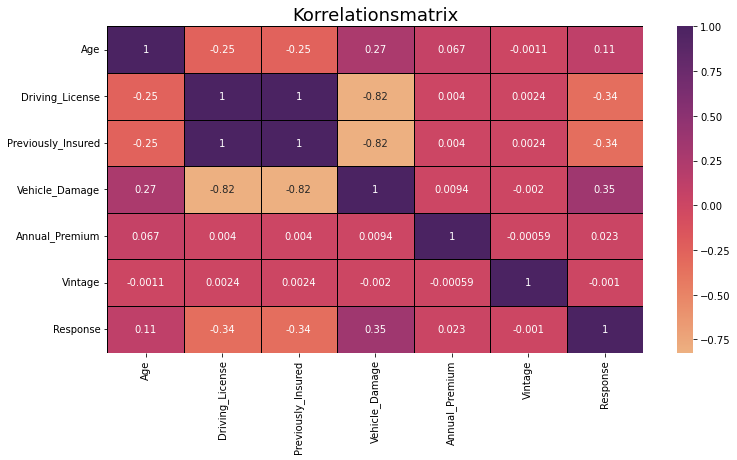

In [24]:
def correlation_matrix(data):
        for columns in data:
                if columns == "id":
                        selected_columns = data.drop("id", axis="columns")
                        correlation = selected_columns.corr()
                        plt.figure(figsize=(12,6))
                        sns.heatmap(correlation,
                                annot=True, 
                                cmap = "flare",
                                linewidths=1, 
                                linecolor='black'
                        )
                        plt.title('Korrelationsmatrix', fontsize=18)
                        
correlation_matrix(data)




- Es fällt auf, dass `Previously_Insured` und `Driving_License` die höchste Korrelation, undzwar von 1, aufweisen. Das liegt daran, dass jeder KFZ-Besitzer eine KFZ-Versicherung haben muss sofern das KFZ angemeldet ist.
- Die geringste Korrelation weisen die Variablen (`Driving_License` und `Vintage`), sowie (`Previously_Insured` und `Vintage`) auf, mit einer Korrelation von 0,0024.
- Alle anderen Variablen sind zudem nahezu unkorreliert.

#### 2.8 Interpretation der Variablen <a class="anchor" id="section_2_8"></a>

##### 2.8.1 Interpretation der Variable Gender <a class="anchor" id="section_2_8_1"></a>

##### 2.8.2 Interpretation der Variable Age <a class="anchor" id="section_2_8_2"></a>

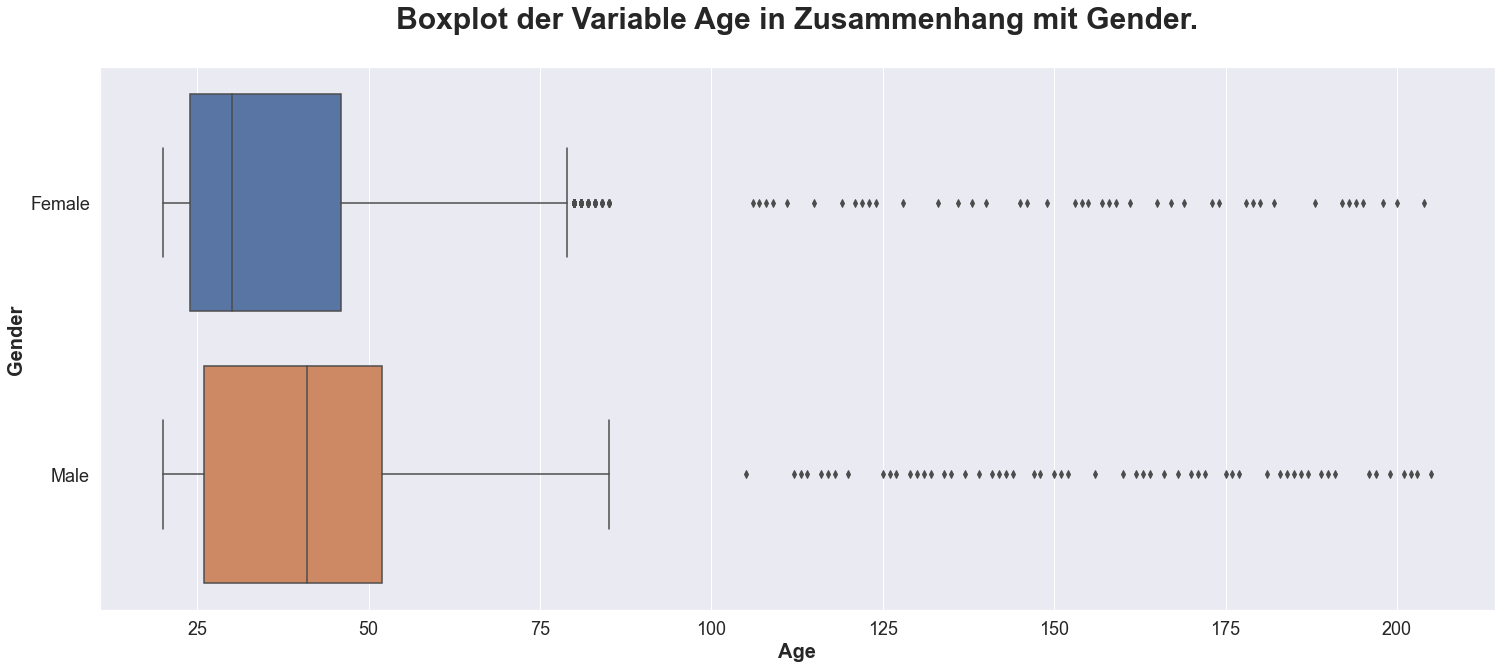

In [26]:
sns.set(rc={"figure.figsize":(25, 10)}) 
boxplot = sns.boxplot(data=data, y="Gender",x="Age", orient="horizontal")
boxplot.set_xlabel("Age", fontsize = 20, weight='bold')
boxplot.set_ylabel("Gender", fontsize = 20, weight='bold')
boxplot.set_title("Boxplot der Variable Age in Zusammenhang mit Gender." + "\n", fontsize = 30, weight='bold')
plt.tick_params(axis="both", labelsize=18)

##### 2.8.4 Interpretation der Variable Region_Code <a class="anchor" id="section_2_8_4"></a>


Text(0.5, 1.0, 'Histogramm der Variable Region_Code in Zusammenhang mit Gender\n')

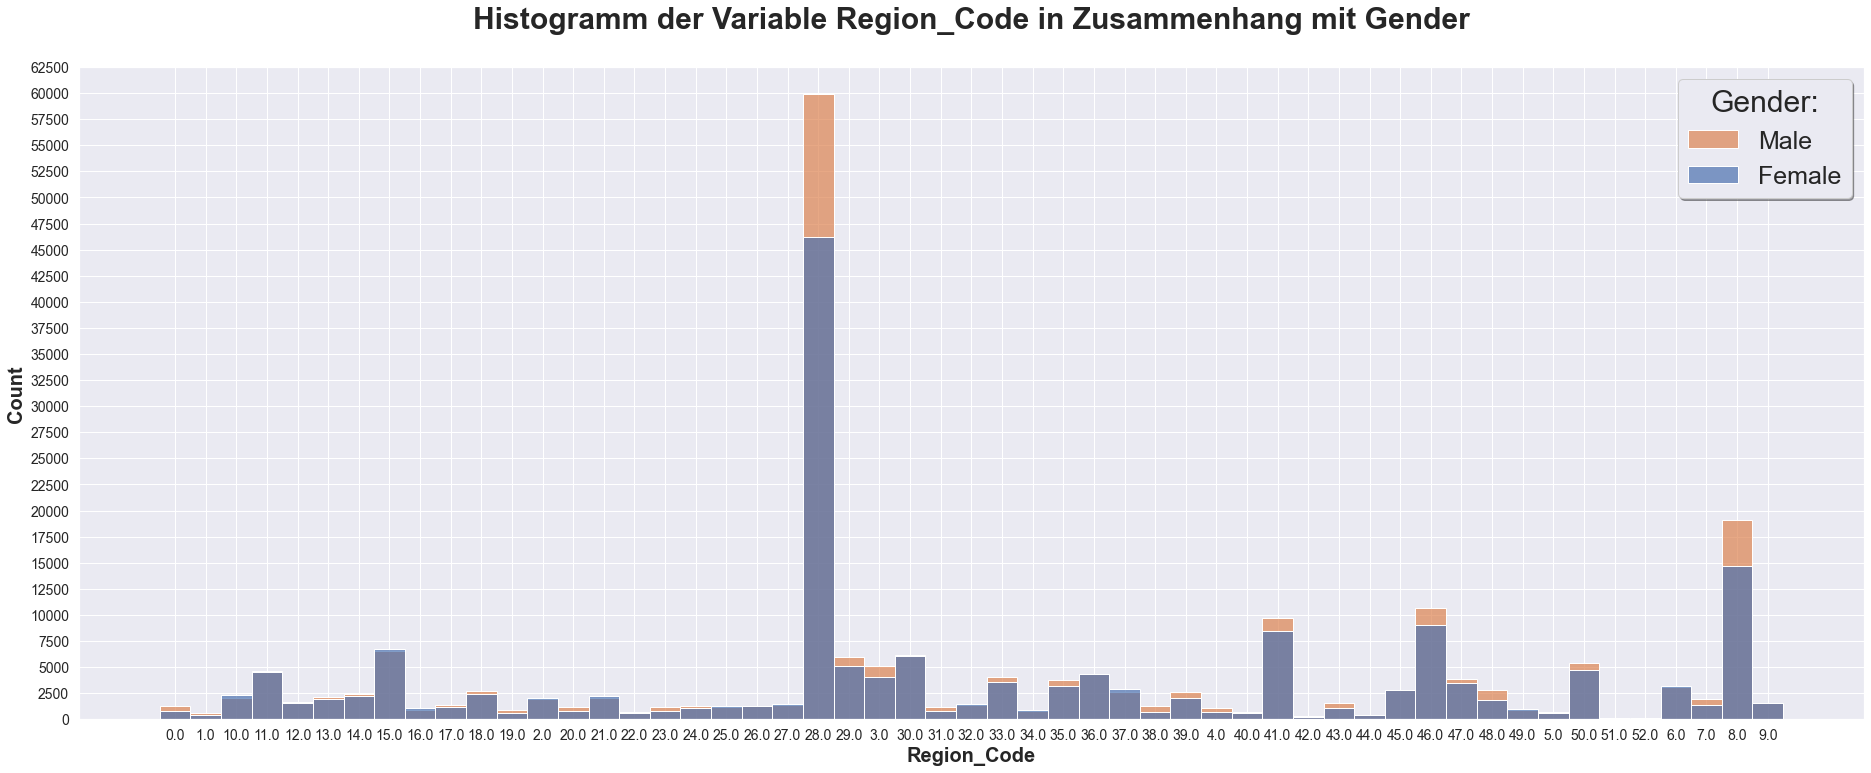

In [59]:
sns.set(rc={"figure.figsize":(32, 12)})     #größe des plots ändern

histogram =sns.histplot(data=data, x="Region_Code", 
                    bins="auto", binwidth=2, 
                    alpha=0.7,
                    hue="Gender"
                    )                 

histogram.set_xlabel("Region_Code", fontsize = 20, weight="bold")
histogram.set_ylabel("Count", fontsize = 20, weight="bold")

histogram.set_ylim(0, 62500)
histogram.set_yticks(range(0,62501, 2500))

plt.tick_params(axis="both", labelsize=14)
plt.legend(title="Gender:",title_fontsize=30, labels=["Male","Female"], fontsize = 25, shadow = True) 
histogram.set_title("Histogramm der Variable Region_Code in Zusammenhang mit Gender" + "\n", fontsize = 30, weight="bold")